In [1]:
import pandas as pd
import numpy as np


#Завдання


1. Вступ. Опис завдання. Кінцева мета. 
2. Опис датасету. 
3. Опис інструменту, який будете використовувати для тренування. 
4. Опис процесу тренування моделі. 
5. Код з використанням Python SDK для реєстрації та публікації моделі як Web API.
6. Код який буде консюмити модель з прикладами.

#Вступ:

Іваненко Андрій Юрійович Task: Binary classification: Les Podervianskyi or Leonardo DiCaprio Tool: Designer Using an Azure ML SDK for Python you need to do:

register a model;

deploy a model as web API;

consume a model;

add a few test calls to web API and explain results.
Adding a model interpretability / fairness description will be a big plu

#Опис датасету

Було зібрано дата сет яки містить (100 фотографій Леонарда Декапріо та 106 фотографій Леся Подервіанського) із особливостей можно додати що Декапріо доволі часто ходить в чорному костюмі, що становить загрозу в класифікації наявність костюму а не самого актора. 

#Опис інструменту, який будете використовувати для тренування.

Було використано готовий шаблон Dense_net з заміною дата сету на власний.

#Опис процесу тренування моделі.
Так як модель тренувалась доволі довгий час буловирішено змінити завдання на більш простий дата сет по задачі регресії їх оцінок.



#Код з використанням Python SDK для реєстрації та публікації моделі як Web API.

Розгортання моделі було зроблено засобами самого Designera.

# Виконання

#Спочатку необхідно завантажити дата сет 




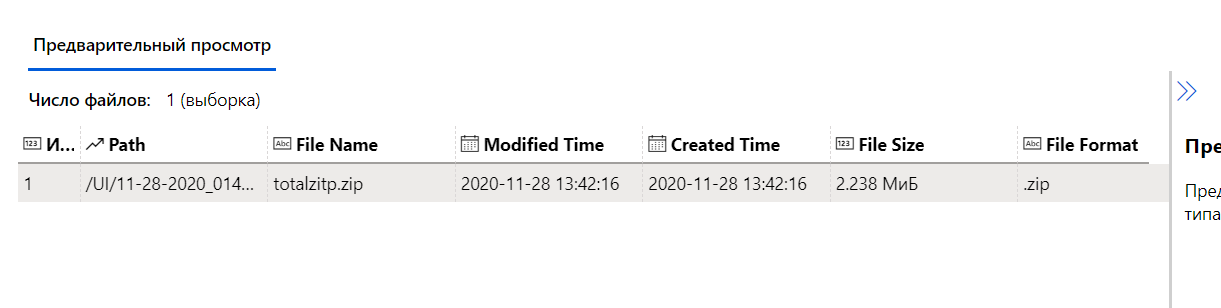

#після чого побудудувати модель

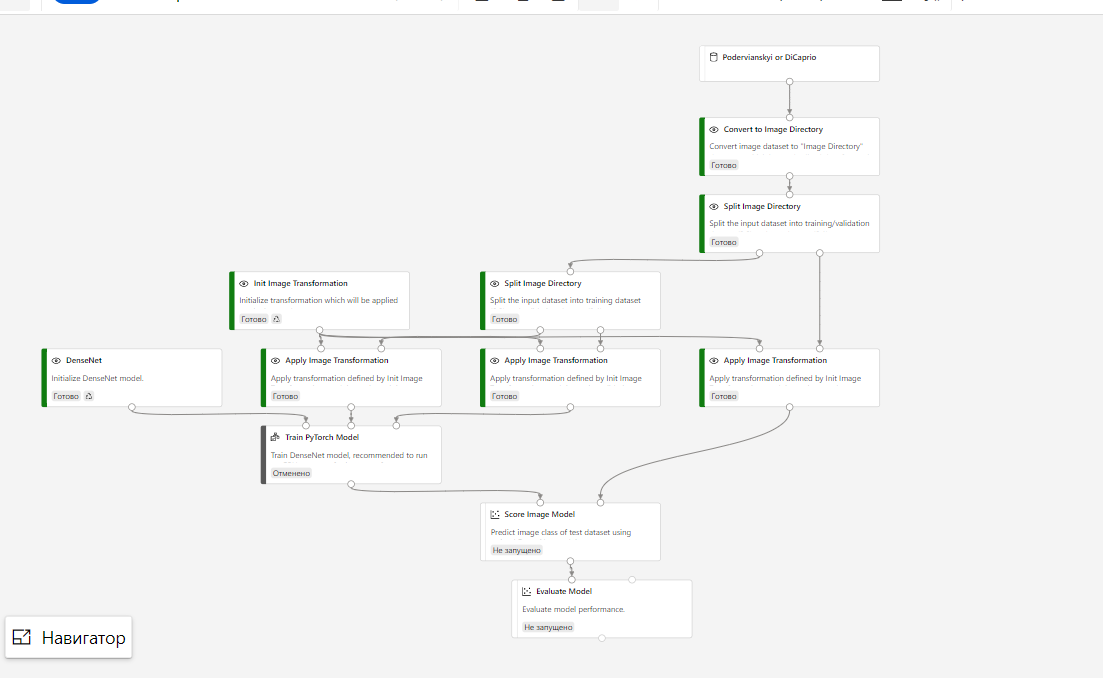

#Так як модель дуже довго вчилась я замінив  задачу на класифікацію вина


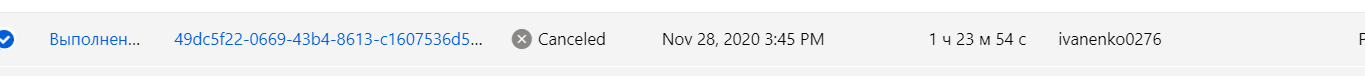

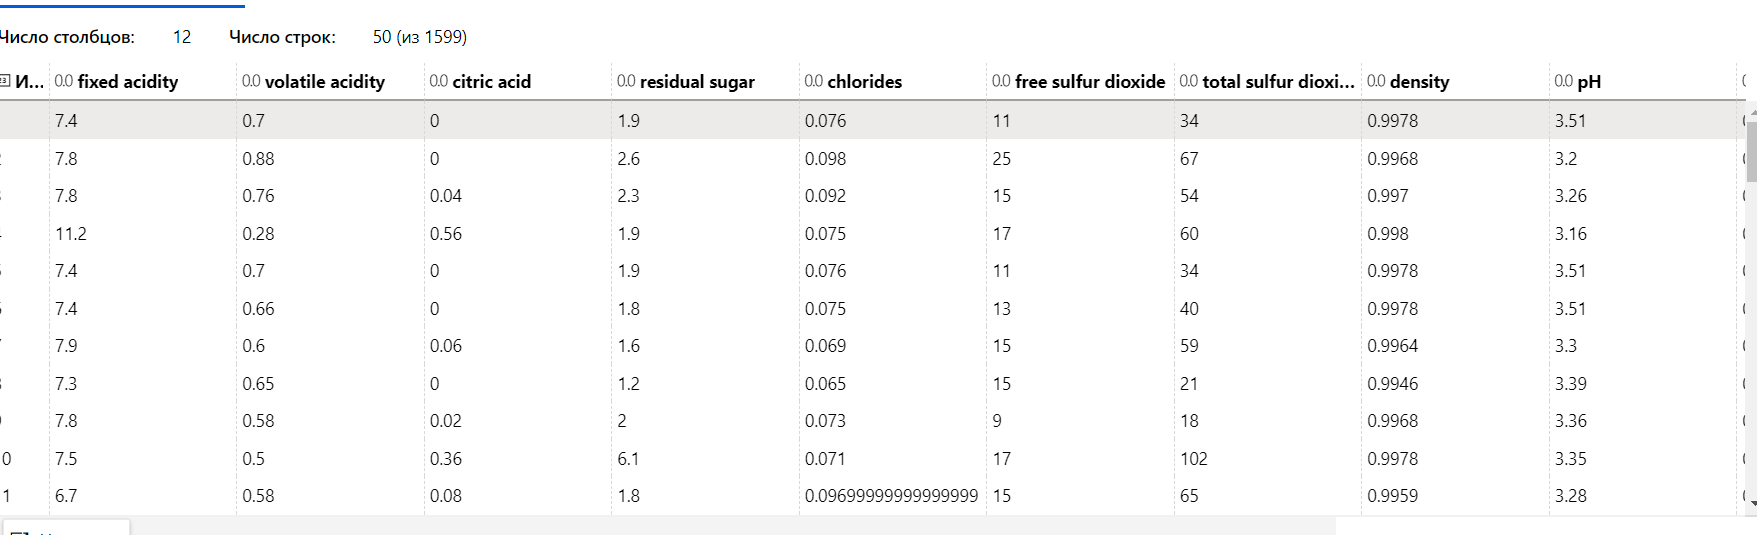

#модель

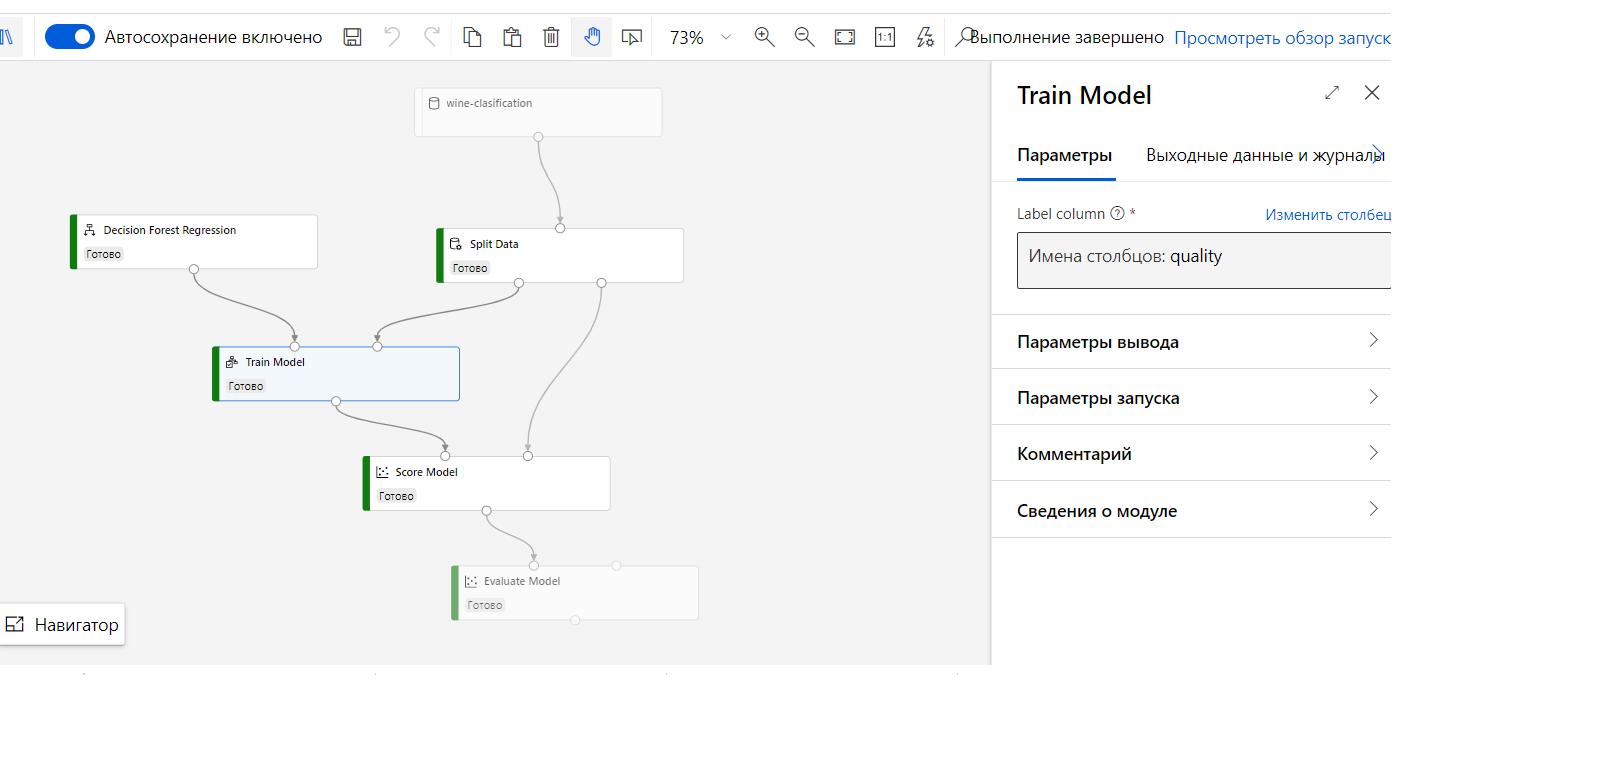

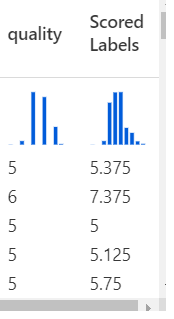

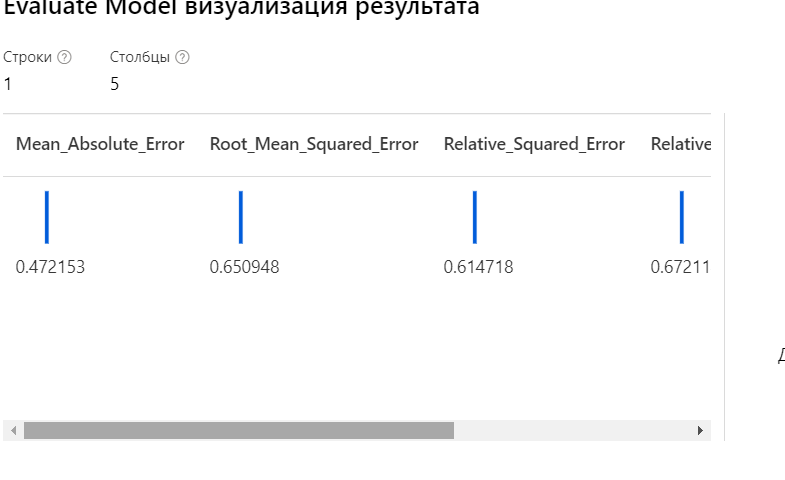

#Потім модель було задеплоїно та запущено.

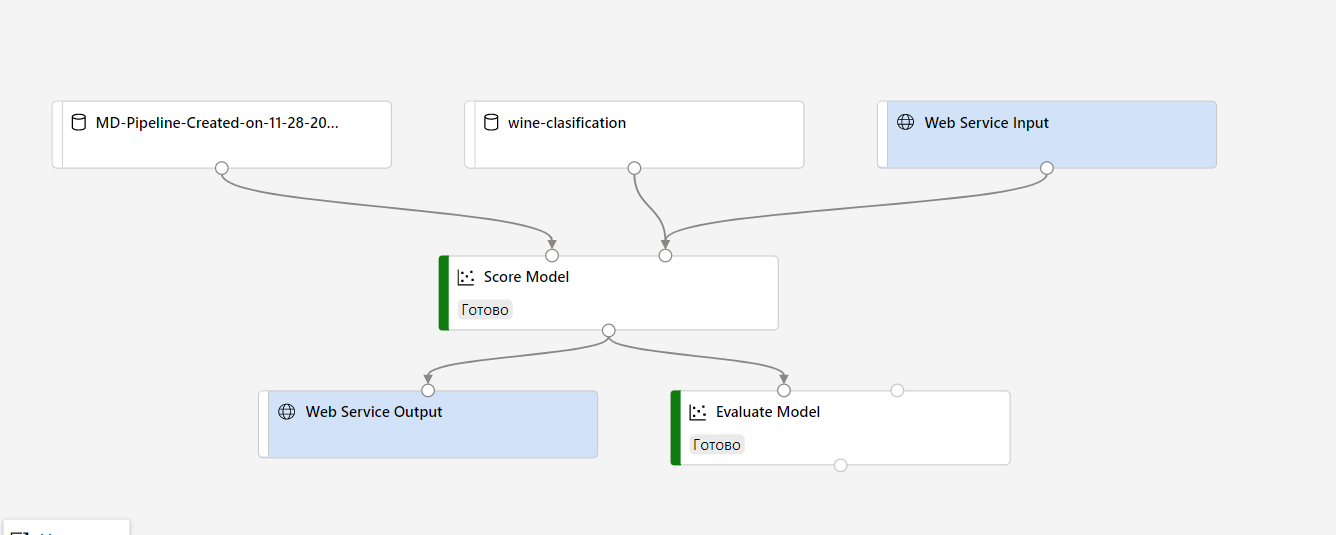

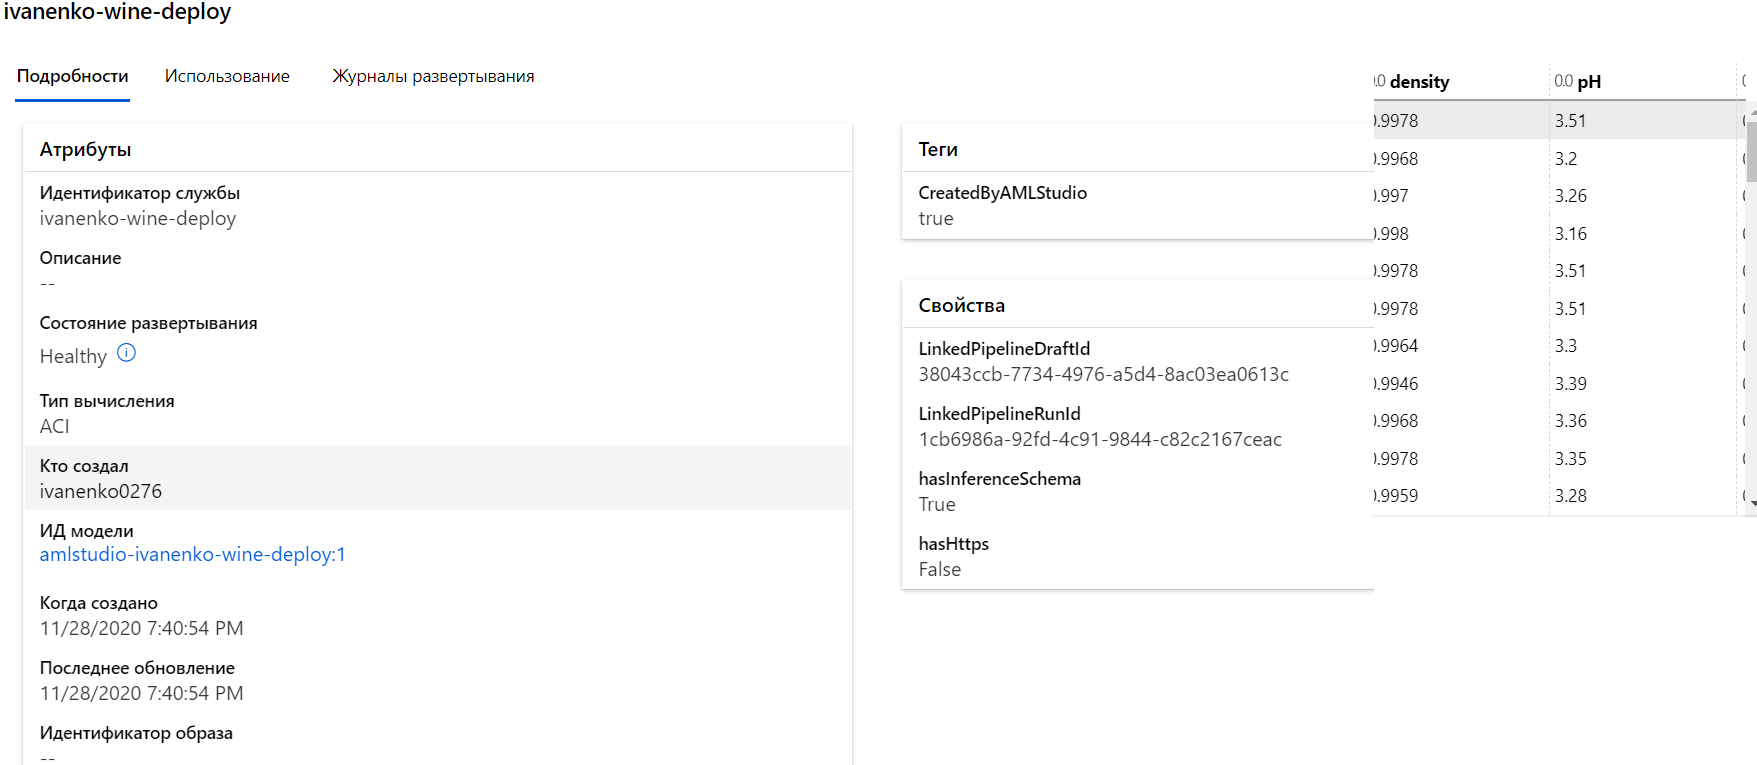

Використання сервісу 

In [55]:
data2=pd.read_csv("winequality-red.csv")

In [105]:
mas=np.array(data2.drop(["quality"],axis=1))

In [106]:
list(mas[1,:])

[7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8]

In [108]:
y=np.array(data2.loc[:,"quality"])
y

array([5, 5, 5, ..., 6, 5, 6])

In [112]:
import requests
import json

# URL for the web service
scoring_uri = 'http://356d5d10-74c7-4129-84ec-e4b3e9cc1bd6.westeurope.azurecontainer.io/score'
# If the service is authenticated, set the key or token
key = 'UIcnuOw6fP3a9FLXllgxkWwYSvtOVj3h'
#7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8
# Two sets of data to score, so we get two results back
data = { 
        "data":  {  'fixed acidity':7.8,
 'volatile acidity':0.88,
 'citric acid':0.0,
 'residual sugar':2.6,
 'chlorides':0.098,
 'free sulfur dioxide':25.0,
 'total sulfur dioxide':67.0,
 'density':0.9968,
 'pH':3.2,
 'sulphates':0.68,
 'alcohol':9.8,

 }   }

data={"data":[ {
    "fixed acidity": 7.6,
    "volatile acidity": 0.54,
    "citric acid": 0.13,
    "residual sugar": 2.5,
    "chlorides": 0.09699999999999999,
    "free sulfur dioxide": 24.0,
    "total sulfur dioxide": 66.0,
    "density": 0.99785,
    "pH": 3.39,
    "sulphates": 0.61
  }]}

# Convert to JSON string
input_data = json.dumps(data)

# Set the content type
headers = {'Content-Type': 'application/json'}
# If authentication is enabled, set the authorization header
headers['Authorization'] = f'Bearer {key}'

# Make the request and display the response
resp = requests.post(scoring_uri, input_data, headers=headers)


#Проблеми:

1) Я розмітив дата-сет з картиками, але картинки були  невідповідного формату формату (jfif ->jpeg)

2) Для Pythorch моделі був необхідий деякий формат ( Головна_папка_/клас1/файли_фотографії , Головна_папка_/клас2/файли_фотографії , ітд ).
